In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Update the path to your local file location
df = pd.read_csv(r'C:\Users\DELL\Downloads\synthetic_regression_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Check basic information and summary statistics
print(df.info())
print(df.describe())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0   2.056544   0.606851   0.482688  -1.130888   0.420094  74.905613
1  -0.799192  -0.645964  -0.182896  -0.482744   1.374876 -41.649588
2   1.076007  -0.796026  -0.751969   0.021312  -0.319054 -24.182866
3  -0.103255  -0.828497   1.489863  -1.643189  -1.600904 -87.094505
4  -2.063403   0.503252  -0.645572  -0.317350  -1.661083 -86.122029
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Target     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None
         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.000000  1

In [4]:
# Example feature engineering: Creating an interaction term
df['Feature_1_Feature_2'] = df['Feature_1'] * df['Feature_2']

# Example of scaling or normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']] = scaler.fit_transform(df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']])

# Splitting the dataset into features and target
X = df.drop('Target', axis=1)
y = df['Target']


In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, RMSE: {rmse_linear}, R-squared: {r2_linear}")


Linear Regression - MSE: 0.011084903271487897, RMSE: 0.10528486724827978, R-squared: 0.999996998018671


In [7]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, RMSE: {rmse_lasso}, R-squared: {r2_lasso}")


Lasso Regression - MSE: 0.0560067277543315, RMSE: 0.236657405872564, R-squared: 0.9999848324205549


In [8]:
# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, RMSE: {rmse_ridge}, R-squared: {r2_ridge}")


Ridge Regression - MSE: 0.017695631065898946, RMSE: 0.13302492648334352, R-squared: 0.9999952077205582


In [9]:
# Cross-validation for Linear Regression
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV Scores: {cv_scores_linear}")

# Cross-validation for Lasso Regression
cv_scores_lasso = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression CV Scores: {cv_scores_lasso}")

# Cross-validation for Ridge Regression (Optional)
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge Regression CV Scores: {cv_scores_ridge}")


Linear Regression CV Scores: [-0.01102759 -0.01155555 -0.01051577 -0.01040045 -0.01120134]
Lasso Regression CV Scores: [-0.07370902 -0.06549957 -0.05347948 -0.06974363 -0.04767852]
Ridge Regression CV Scores: [-0.01979203 -0.0193967  -0.01591388 -0.01893514 -0.01480411]


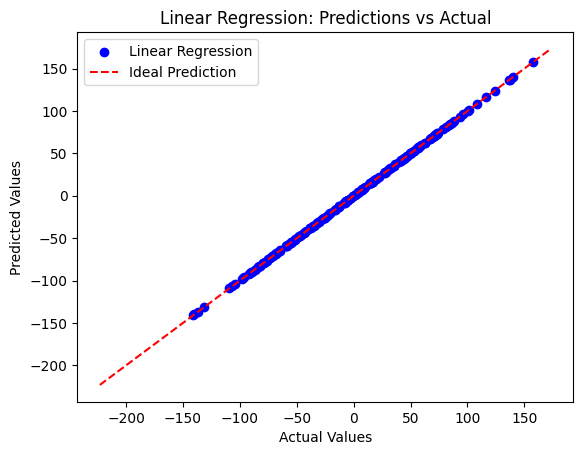

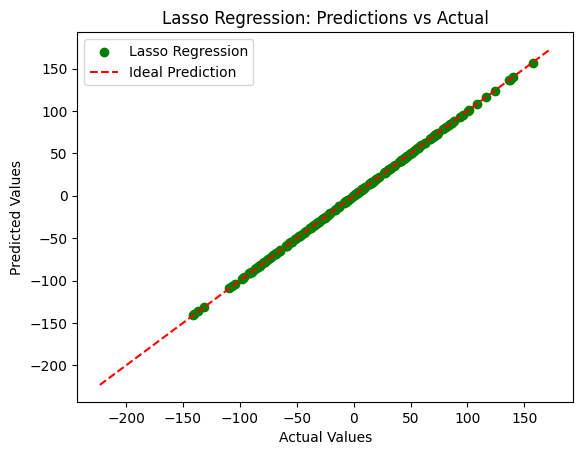

In [10]:
# Linear Regression
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predictions vs Actual')
plt.legend()
plt.show()

# Lasso Regression
plt.scatter(y_test, y_pred_lasso, color='green', label='Lasso Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predictions vs Actual')
plt.legend()
plt.show()


In [14]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


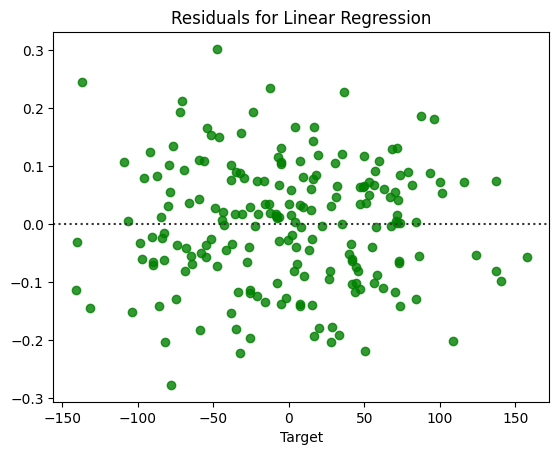

In [ ]:
# Residual Plot for Linear Regression
sns.residplot(x=y_test, y=y_pred_linear, color='g', line_kws={"color": "red"})
plt.title('Residuals for Linear Regression')
plt.show()

# Residual Plot for Lasso Regression
sns.residplot(x=y_test, y=y_pred_lasso, color='b', line_kws={"color": "red"})
plt.title('Residuals for Lasso Regression')
plt.show()


In [16]:
# Summary of the model performance
print(f"Linear Regression - RMSE: {rmse_linear}, R-squared: {r2_linear}")
print(f"Lasso Regression - RMSE: {rmse_lasso}, R-squared: {r2_lasso}")
print(f"Ridge Regression - RMSE: {rmse_ridge}, R-squared: {r2_ridge}")


Linear Regression - RMSE: 0.10528486724827978, R-squared: 0.999996998018671
Lasso Regression - RMSE: 0.236657405872564, R-squared: 0.9999848324205549
Ridge Regression - RMSE: 0.13302492648334352, R-squared: 0.9999952077205582
